In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
model = tf.keras.models.load_model('trained_model.keras')


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [6]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 3.4 MB/s eta 0:00:12
   -- ------------------------------------- 2.1/39.5 MB 6.2 MB/s eta 0:00:07
   --- ------------------------------------ 3.9/39.5 MB 6.9 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/39.5 MB 6.9 MB/s eta 0:00:05
   ------- -------------------------------- 7.1/39.5 MB 7.2 MB/s eta 0:00:05
   -------- ------------------------------- 8.4/39.5 MB 7.2 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/39.5 MB 7.2 MB/s eta 0:00:05
   ------------ --------------------------- 12.3/39.5 MB 7.5 MB/s eta 0:00:04
   -------------- ------------------------- 14.2/39.5 MB 7.7 MB/s eta 0:00:04
   ---------------- ----------------------- 16.3/39.5 MB 7.9 MB/s eta 0:00:03
   ------------------ --------------------- 18.1/39.5 MB 7.9 MB/s eta 0:00:03
   -------------------- ------------------- 19.9/39.5 MB 8.0 MB/s eta 0:00:03


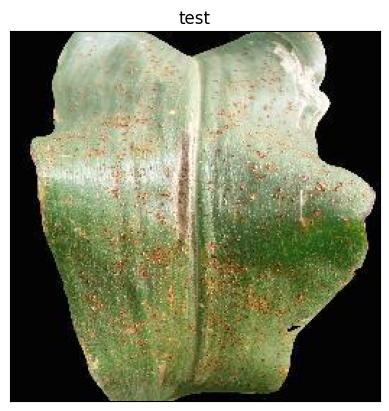

In [32]:
import cv2
image_path= 'test/test/CornCommonRust2.JPG'
img=cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("test")
plt.xticks([])
plt.yticks([])
plt.show()

In [33]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [34]:
prediction=model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 49ms/step


(array([[2.5220069e-18, 1.8838951e-25, 3.2657270e-24, 2.8255245e-27,
         8.8132788e-27, 7.0858568e-27, 9.7703023e-28, 3.9905357e-17,
         1.0000000e+00, 4.1568480e-26, 1.1018507e-25, 1.7691935e-27,
         2.2062941e-28, 3.1918819e-29, 1.8516699e-32, 3.6970344e-27,
         2.7448807e-25, 9.4970464e-29, 2.2436282e-22, 1.9190477e-22,
         1.7257156e-17, 1.3591000e-32, 1.2363466e-25, 4.7053731e-32,
         3.6524465e-33, 6.1323656e-28, 1.8481813e-27, 1.0947178e-29,
         1.5018308e-30, 1.2209994e-21, 4.7509073e-20, 1.9351832e-30,
         1.8069204e-25, 1.3060512e-33, 8.7963420e-29, 2.5913447e-34,
         6.4914919e-35, 8.9421801e-25]], dtype=float32),
 (1, 38))

In [35]:
result_index=np.argmax(prediction)
result_index

8

In [36]:
class_name= ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

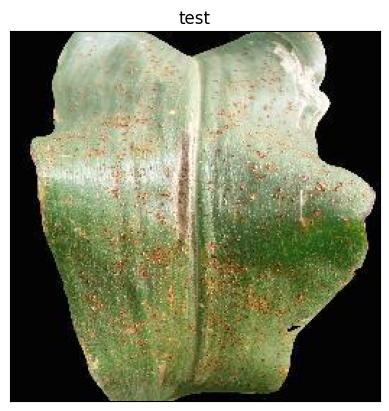

In [37]:
model_prediction=class_name[result_index]
plt.imshow(img)

plt.title("test")
plt.xticks([])
plt.yticks([])
plt.show()

In [39]:
model_prediction

'Corn_(maize)___Common_rust_'